How can we determine if a passenger would survive on the titanic?
What does this say about our society?

We're gonna try to use logistic regression to classify a passenger as will survive or not!

**1. Import libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

**2. Data preprocessing - prepare the dataset for training**

In [3]:
data = pd.read_csv('dataset.csv')

# Inspect the DataFrame
print(data.head())  # Show the first few rows of the DataFrame
print(data.columns)  # List all columns in the DataFrame

data.columns = data.columns.str.strip().str.lower()

# Define the feature set (X) and the target variable (y)
# Updated to match new column names
X = data[['sex', 'age', 'fare', 'pclass_1', 'pclass_2', 'pclass_3', 'family_size', 'mr', 'mrs', 'master', 'miss', 'emb_1', 'emb_2', 'emb_3']]
y = data['survived']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Unnamed: 0  PassengerId  Survived  Sex     Age      Fare  Pclass_1  \
0           0            1         0    1  0.2750  0.014151         0   
1           1            2         1    0  0.4750  0.139136         1   
2           2            3         1    0  0.3250  0.015469         0   
3           3            4         1    0  0.4375  0.103644         1   
4           4            5         0    1  0.4375  0.015713         0   

   Pclass_2  Pclass_3  Family_size  Mr  Mrs  Master  Miss  Emb_1  Emb_2  Emb_3  
0         0         1          0.1   1    0       0     0      0      0      1  
1         0         0          0.1   1    0       0     0      1      0      0  
2         0         1          0.0   0    0       0     1      0      0      1  
3         0         0          0.1   1    0       0     0      0      0      1  
4         0         1          0.0   1    0       0     0      0      0      1  
Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Sex', 'Age', 'Fare',
     

**3. Train the model**

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

These are the coefficients, or weights, of the parameters/features, after training:

In [6]:
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Model Coefficients:
sex: -3.1510
age: -0.7011
fare: 0.6650
pclass_1: 0.7786
pclass_2: 0.1753
pclass_3: -0.9505
family_size: -2.1740
mr: -0.7117
mrs: 0.1263
master: 1.7722
miss: -1.1833
emb_1: 0.2501
emb_2: -0.0411
emb_3: -0.3699


We can analyze some factors that affect the chance of survival/getting on a lifeboat. What are the attributes of survived passengers?
- being female
- being younger
- having paid a higher fare (being in a higher class)
- not having a large family
- being a single male

**4. Make predictions on the test set, then evaluate the performance** 

In [7]:
y_pred = model.predict(X_test)

**5. Evaluation Metrics**

- **Confusion matrix**:
    compares true positives (TP), false positives (FP), true negatives (TN), false negatives (FN)

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[91 14]
 [18 56]]


-   To visualize the confusion matrix better, using Matplotlib:

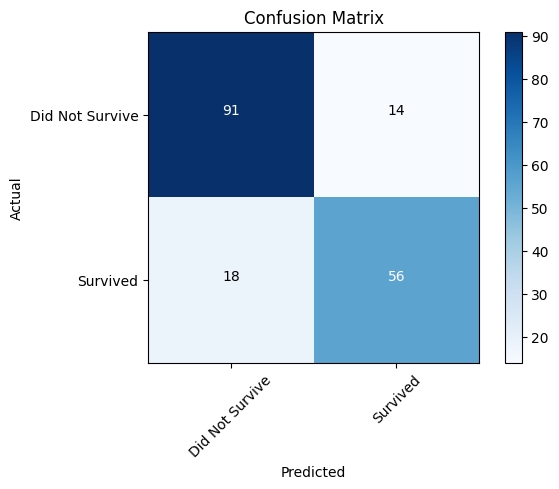

In [9]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix using matplotlib.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add numerical values inside the matrix cells
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f'{cm[i, j]:d}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

class_names = ['Did Not Survive', 'Survived']
plot_confusion_matrix(conf_matrix, class_names)

- **Accuracy**: (TP + TN) / num_total_predictions

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.82


- **Classification report**:
    - precision: TP/(TP + FP)
    - recall: TP/(TP + FN)
    - f1: balances precision and recall
    - support: number of datapoints of that class

In [11]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

